In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [120]:
df =  pd.read_csv('COVID-19 Survey Student Responses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [121]:
df.head(20)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
5,R6,Delhi-NCR,21,0.0,Very poor,Smartphone,6.0,0.0,5.0,1.0,Youtube,0,1,Decreased,YES,Coding and studying for exams,NO,YES,School/college
6,R7,Delhi-NCR,19,2.0,Very poor,Smartphone,2.0,1.0,5.0,4.0,Instagram,0,3,Increased,NO,Watching web series,NO,YES,"Friends , relatives"
7,R8,Outside Delhi-NCR,19,2.0,Very poor,Tablet,1.0,1.0,10.0,5.0,Instagram,0,3,Increased,YES,Scrolling through social media,NO,YES,Eating outside
8,R9,Delhi-NCR,21,3.0,Very poor,Laptop/Desktop,4.0,1.0,8.0,2.0,Whatsapp,1,3,Increased,NO,Online surfing,NO,NO,"Friends , relatives"
9,R10,Outside Delhi-NCR,20,0.0,Very poor,Laptop/Desktop,1.0,0.5,8.0,5.0,Instagram,3,3,Decreased,YES,live stream watching,NO,NO,School/college


In [122]:
df['Time spent on TV'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

In [123]:
df['Time spent on TV'].replace({'n':'0', 'N':'0', 'No tv':'0', ' ':'0', 0:'0'}, inplace = True)
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV']) 

In [124]:
df['Prefered social media platform'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

In [141]:
df['Prefered social media platform'].replace({'None ':'None','Whatsapp':'WhatsApp'}, inplace = True)

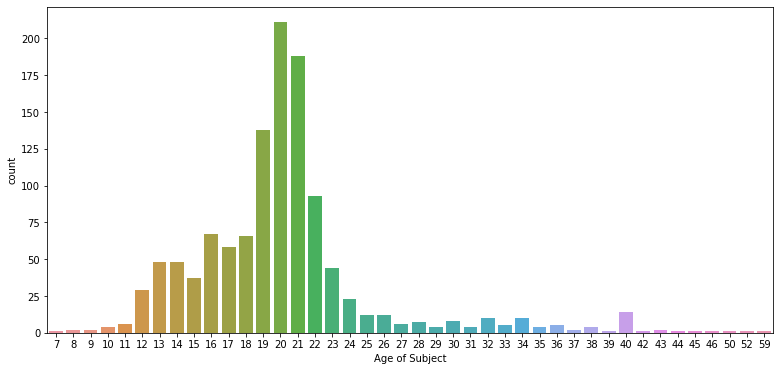

In [137]:
age_of_student = df['Age of Subject'].value_counts()
sns.countplot(x="Age of Subject", data=df)

Ожидаемо в исследовании большая часть опрошенных в возрасте 12-23 лет, что как раз соответствует возрасту обучения в школе и институте. Но при этом есть достаточно большой хвост из обучавшихся в возрасте вплоть до 59 лет, вероятно такая разница в возрасте будет отражаться в привычках во время карантина.

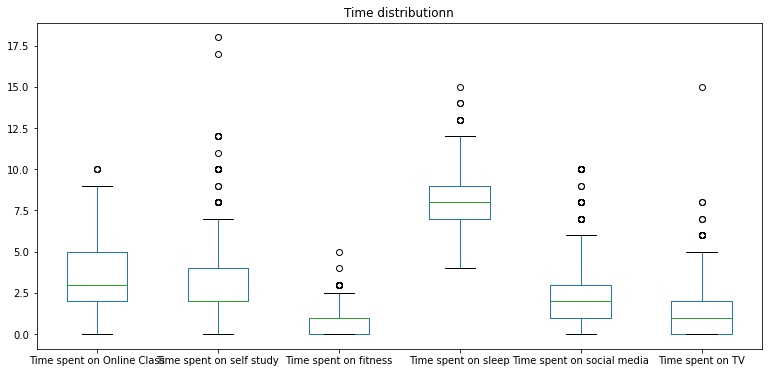

In [105]:
df[['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media', 'Time spent on TV']].plot(kind='box',
                                        title='Time distributionn')

Медиана времени онлайн-классов расположена выше, чем медиана времени самообучения, но при этом количество выбросов с высокими значениями для самообучения больше. Дыв верхних значения для самообучения 17 и 18 часов выглядят маловероятными в реальности. Для свободного времения более популярными вероятно являются соцсети - значение медианы времен, проведенных в сетях выше, чем аналогичное значение для фитнеса и ТВ.

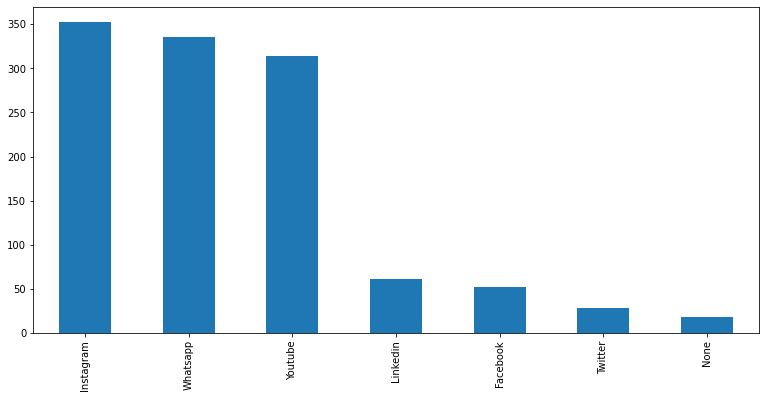

In [139]:
social_media = df['Prefered social media platform'].value_counts().head(7)
social_media.plot(kind='bar')

Не смотря на то, что facebook имеет более 2,5 млрд пользователей, эта соцсеть не была среди наиболее популярных у опрошенных во время карантина. Интересно, что LinkedLin оказался более популярен, чем FB, можно предположить, что эта соцсеть была популярна как раз у более взрослой части опрошенных в силу специфики контента

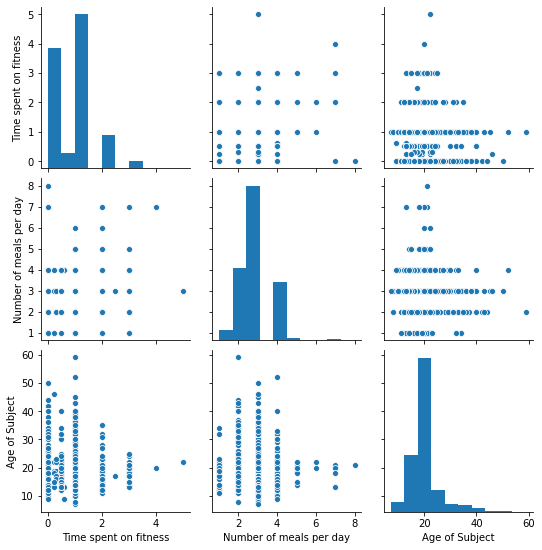

In [134]:
sns.pairplot(df[['Time spent on fitness', 'Number of meals per day', 'Age of Subject']])

Можно заметить, что как для фитнеса, так и для приемов пищи максимальные значения характерны для учащихся в возрасте до 25 лет. При этом  возрастные опрошенные придерживались более умеренных привычек. 

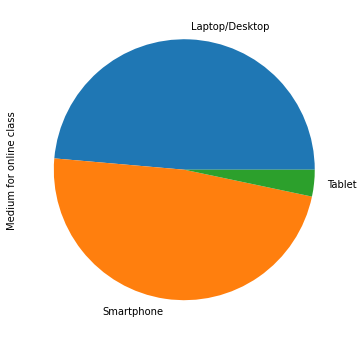

In [111]:
rating = df['Medium for online class'].value_counts().sort_values(ascending = False).head(3)
ax = rating.plot(kind='pie')

Планшеты почти не использовались для онлайн-обучения во время карантина, хотя доля смартфонов и ноутбуков практически одинакова

In [148]:
relax = df.groupby('Prefered social media platform').mean()[['Time spent on social media', 'Time spent on TV', 'Time spent on sleep']]

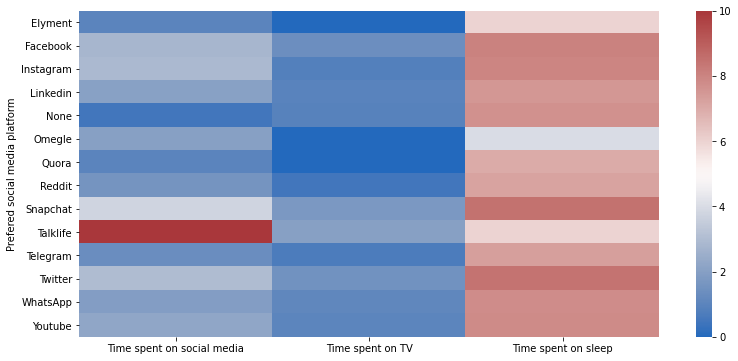

In [153]:
sns.heatmap(relax, cmap="vlag")

Talklife - соц сеть для моральной поддержки людям с психологическими трудностями. Среднее время использование этой сети резко отличается от других приложений в большую сторону. При этом люди, предпочитавшие эту соц сеть, имели более низкую продолжительность сна. По всей вероятности эта группа учащихся столкнулась с ментальнуми трудностями во время или до карантина.

Интересно отметить, что большее среднее время, проведенное в соц сетях, не соответствует самым популярным сетям. Snapchat, omegle, twitter, Fb не были наиболее распространены среди ответов, однако среднее время использование этих соцсетей выше.